In [21]:
import os
import sys
sys.path.append("/home/debian/software/MGCosmoPopPrivate/MGCosmoPop")

import numpy as np
import scipy.stats as sp
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
%matplotlib inline

from population.astro.astroMassDistribution import BrokenPowerLawMass, PowerLawPlusPeakMass
from dataStructures.O1O2data import O1O2Data
from dataStructures.O3adata import O3aData
from cosmology.cosmo import Cosmo
cosmo = Cosmo()
import Globals

# events = {'use': ["GW150914", ],
#           'not_use': None }
# fname_data = os.path.join(Globals.dataPath, 'O1O2')
# gw = O1O2Data(fname_data, events_use=events)

# events = {'use': ["GW170814", ],
#           'not_use': None }
# fname_data = os.path.join(Globals.dataPath, 'O1O2')
# gw = O1O2Data(fname_data, events_use=events)

# events = {'use': ["GW190412", ],
#           'not_use': None }
# fname_data = os.path.join(Globals.dataPath, 'O3a')
# gw = O3aData(fname_data, events_use=events)

events = {'use': ["GW190814", ],
          'not_use': None }
fname_data = os.path.join(Globals.dataPath, 'O3a')
gw = O3aData(fname_data, events_use=events)

FAR th in LVC data: 1.0
In the O3a data we have the following BBH events, total 37 (excluding ['GW190425', 'GW190426_152155', 'GW190917_114630']):
['GW190701_203306', 'GW190413_134308', 'GW190720_000836', 'GW190527_092055', 'GW190708_232457', 'GW190503_185404', 'GW190924_021846', 'GW190413_052954', 'GW190514_065416', 'GW190909_114149', 'GW190719_215514', 'GW190731_140936', 'GW190828_065509', 'GW190706_222641', 'GW190424_180648', 'GW190930_133541', 'GW190408_181802', 'GW190803_022701', 'GW190915_235702', 'GW190728_064510', 'GW190727_060333', 'GW190707_093326', 'GW190828_063405', 'GW190602_175927', 'GW190421_213856', 'GW190521', 'GW190521_074359', 'GW190910_112807', 'GW190519_153544', 'GW190412', 'GW190512_180714', 'GW190630_185205', 'GW190517_055101', 'GW190814', 'GW190513_205428', 'GW190929_012149', 'GW190620_030421']
Using only events with SNR>8.0 (round to 1 decimal digit)
Excluded the following events with SNR<8.0: 
[]
37 events remaining.
Using only events with FAR<1.0
Excluded the

In [13]:
def sky2xyz(r, ra, dec):
    return r*np.cos(ra)*np.cos(dec), r*np.sin(ra)*np.cos(dec), r*np.sin(dec)

def xyz2sky(x1, x2, x3):
    r = np.sqrt(x1**2+x2**2+x3**2)
    return r, np.arctan2(x2,x1), np.arcsin(x3/r)

def jac_sky2xyz(r, ra, dec):
    return r**2*np.cos(dec)


def rejection_sampling( x1, x2, x3, wt ):
    wt /= np.max(wt)
    r = np.random.rand(len(x1))
    s = r < wt
    print(s.sum())
    return x1[s], x2[s], x3[s] 

In [22]:
idx = np.random.choice(np.arange(np.shape(gw.dL)[-1]), 10000)

dL, ra, dec = (gw.dL[:,idx]).flatten(), gw.ra[:,idx].flatten(), gw.dec[:,idx].flatten()
z           = cosmo.z_from_dLGW_fast(dL, H0=70, Om=0.3, w0=1, Xi0=1, n=0)

xs1, ys1, zs1 = sky2xyz(dL, ra, dec) 
xs2, ys2, zs2 = sky2xyz(z, ra, dec) 

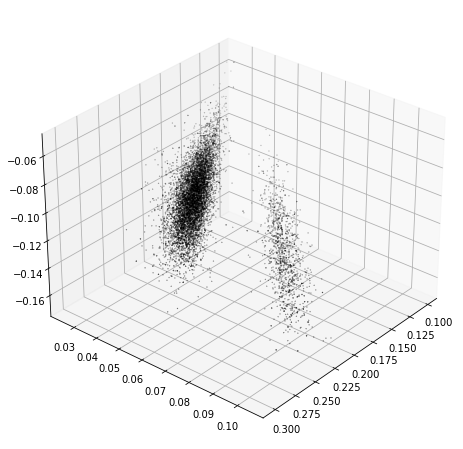

In [29]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.scatter3D(xs1, ys1, zs1, c='k', s=0.05)

ax.view_init(30, 40);
plt.show()

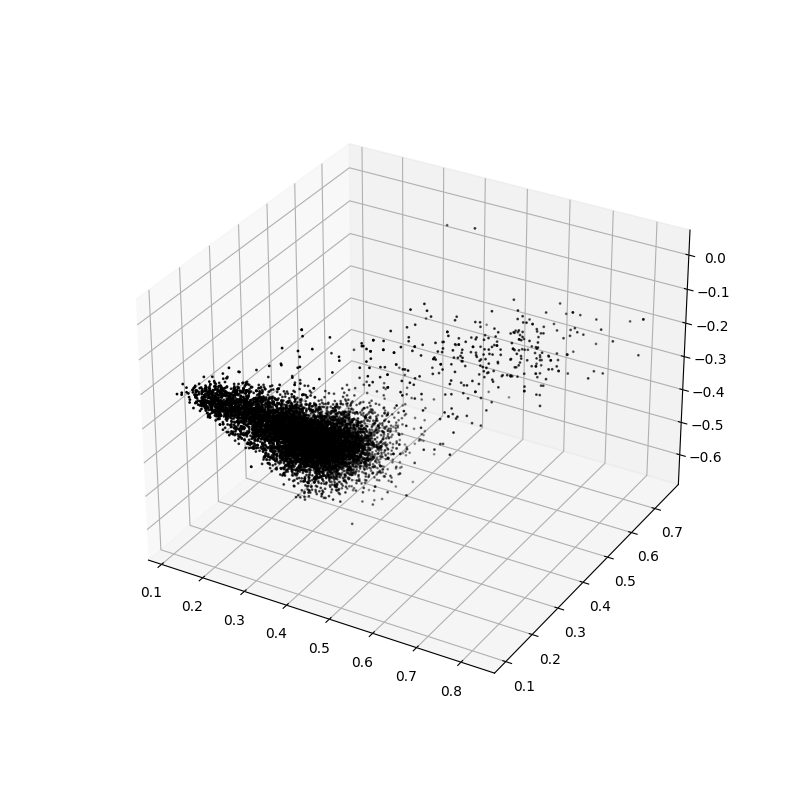

In [6]:
plt.scatter(ra, dec, s=1)


# KDE(y,x,z) == p()

In [7]:
xys_vec = np.squeeze(np.array([xs, ys, zs]))
sky_vec = np.squeeze(np.array([dL, ra, dec]))

NameError: name 'xs' is not defined

In [ ]:
xys_vec[:,4] == sky2xyz(*sky_vec[:,4])

In [ ]:
p_xyz = xys_vec[:,4]
p_sky = sky_vec[:,4]

w_sky = 1/np.squeeze(dL)**2/np.squeeze(np.sin(np.pi/2-dec))

kernel_xyz   = sp.gaussian_kde(xys_vec)
kernel_sky   = sp.gaussian_kde(sky_vec)
kernel_sky_w = sp.gaussian_kde(sky_vec, weights=w_sky)


In [ ]:
dL_reweight, ra_reweight, dec_reweight = rejection_sampling(*sky_vec, w_sky)

kernel_sky_reweight   = sp.gaussian_kde(np.squeeze(np.array([dL_reweight, ra_reweight, dec_reweight])))

In [ ]:
print(p_xyz)
print(kernel_xyz(p_xyz))

print(kernel_sky(p_sky))
print(kernel_sky(p_sky)*sky_jac(*p_sky))
print(kernel_sky_w(p_sky)) #*np.sum(w_sky)/len(w_sky))
print(kernel_sky_reweight(p_sky))

In [ ]:
p(X) = p(Ω) dΩ/dX

KDE(Xsamp) = KDE(Ωsamp(x)) dΩ/dX

In [ ]:
def pl(x):
    return x**3/10**3

def jac(x):
    return 3*x**2/10**3

def inv_jac(y):
    return 1/3*y**(-2/3)*10**3

In [ ]:
loc = 10
x_samples = np.random.normal(loc=loc, size=2000)
y_samples = pl(x_samples)

# wi = 1/jac(x_samples)

kde_x = sp.gaussian_kde(x_samples)
kde_y = sp.gaussian_kde(y_samples, bw_method=0.2)
# kde_y_weight = sp.gaussian_kde(y_samples, weights=wi)


x = np.linspace(loc-15, loc+15,1000)
y = np.linspace(loc-15, loc+15,1000)




plt.hist(x_samples, bins=np.linspace(loc-10,loc+10,50), density=True);
plt.hist(y_samples, bins=np.linspace(loc-10,loc+10,50), density=True);

# plt.plot(x, sp.norm.pdf(x), c='blue')

plt.plot(pl(x), kde_y(pl(x)), c='goldenrod', lw=3)
# plt.plot(pl(x), kde_y_weight(pl(x)), c='cyan', lw=3)

plt.plot(pl(x), kde_y(pl(x))/inv_jac(pl(x)), c='r', lw=3)
# plt.plot(pl(x), sp.norm.pdf(x)/jac(x), c='red')

# plt.plot(y, kde_y(y), c='red')





plt.plot(x, kde_x(x), c='teal', lw=3)
# plt.xlim(loc-5,loc+5)



In [ ]:
print(kde_x(0.1))

print(kde_y(0.1**3)*inv_jac(0.1))

In [ ]:
np.sum(w_sky)/len(w_sky)


# ellisse ra de covarianza 0 tra dl e ra e dec, 0.8 tra ra e dec
# convertire
# samplarla 
# tornare indietro xyz

# altrimenti x,y,z tutti correlati e opposto


In [ ]:
xg, yg, zg= np.mgrid[0:700:20j, 0:700:20j, -600:0:20j]
np.shape(xg)

In [ ]:
xg, yg, zg= np.mgrid[0:700:20j, 0:700:20j, -600:0:20j]
kernel = sp.gaussian_kde(np.squeeze(np.array([xs, ys, zs])))
positions = np.vstack((xg.ravel(), yg.ravel(), zg.ravel()))
density = np.reshape(kernel(positions).T, xg.shape)

In [ ]:
xg, yg, zg= np.mgrid[0:700:20j, 0:700:20j, -600:0:20j]
xg.ravel()

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.scatter3D(xs, ys, zs, c='k', s=1)

print("1")
# plot projection of density onto z-axis
plotdat = np.sum(density, axis=2)
plotdat = plotdat / np.max(plotdat)
plotx, ploty = np.mgrid[0:700:20j, 0:700:20j]
ax.contour(plotx, ploty, plotdat, offset=-600, zdir='z', levels=[0.05, 0.1, 0.2, 0.3, 0.4, 0.5])

print("2")

#This is new
#plot projection of density onto y-axis
plotdat = np.sum(density, axis=1) #summing up density along y-axis
plotdat = plotdat / np.max(plotdat)
plotx, plotz = np.mgrid[0:700:20j, -600:0:20j]
ax.contour(plotx, plotdat, plotz, offset=0, zdir='y', levels=[0.05, 0.1, 0.2, 0.3, 0.4, 0.5])

# print("3")

#plot projection of density onto x-axis
plotdat = np.sum(density, axis=0) #summing up density along z-axis
plotdat = plotdat / np.max(plotdat)
ploty, plotz = np.mgrid[0:700:20j, -600:0:20j]
ax.contour(plotdat, ploty, plotz, offset=0, zdir='x', levels=[0.05, 0.1, 0.2, 0.3, 0.4, 0.5])



ax.set_xlabel('x [Gpc]', fontweight ='bold')
ax.set_ylabel('y [Gpc]', fontweight ='bold')
ax.set_zlabel('z [Gpc]', fontweight ='bold')
# ax.view_init(30+180, 30)
ax.view_init(30, 20)


In [ ]:
import pandas as pd

metadata = pd.read_csv(os.path.join("/home/debian/software/MGCosmoPopPrivate/data/O3a", 'GWTC-2.csv'))
metadata_21 = pd.read_csv(os.path.join("/home/debian/software/MGCosmoPopPrivate/data/O3a", 'GWTC-2.1-confident.csv'))

In [ ]:
metadata_21.network_matched_filter_snr